# Generating DRMs for GBM detectors

When we want to generate DRMS for GBM detectors, we simply need to obtain the proper data 

In [10]:
import matplotlib.pyplot as plt
import pkg_resources
import numpy as np

%matplotlib notebook

from gbm_drm_gen import *
from threeML.plugins.OGIP.response import OGIPResponse
from threeML import download_GBM_trigger_data



In [2]:
def get_path_of_data_file(data_file):
    file_path = pkg_resources.resource_filename("gbm_drm_gen", 'data/%s' % data_file)

    return file_path

To create a DRM generator for TTE data, we need the TTE, CSPEC, and the TRIGDAT data files. The CSPEC data contains the output side of the DRM's energy bounds. The TRIGDAT data contains the spacecraft orientation data.

In [5]:
tte_file = get_path_of_data_file('example_data/glg_tte_n6_bn110721200_v00.fit')
trigdat_file = get_path_of_data_file('example_data/glg_trigdat_all_bn110721200_v01.fit')
cspec_file = get_path_of_data_file('example_data/glg_cspec_n6_bn110721200_v00.pha')


# create the generator
gbm_n6_generator = DRMGenTTE(tte_file = tte_file,
                             trigdat = trigdat_file,
                             mat_type = 2,
                             cspecfile = cspec_file)

We can set the location of the source directly.

In [ ]:
gbm_n6_generator.set_location(0,0)

To see how the effective area varies with location, we can loop through various angles.

<IPython.core.display.Javascript object>


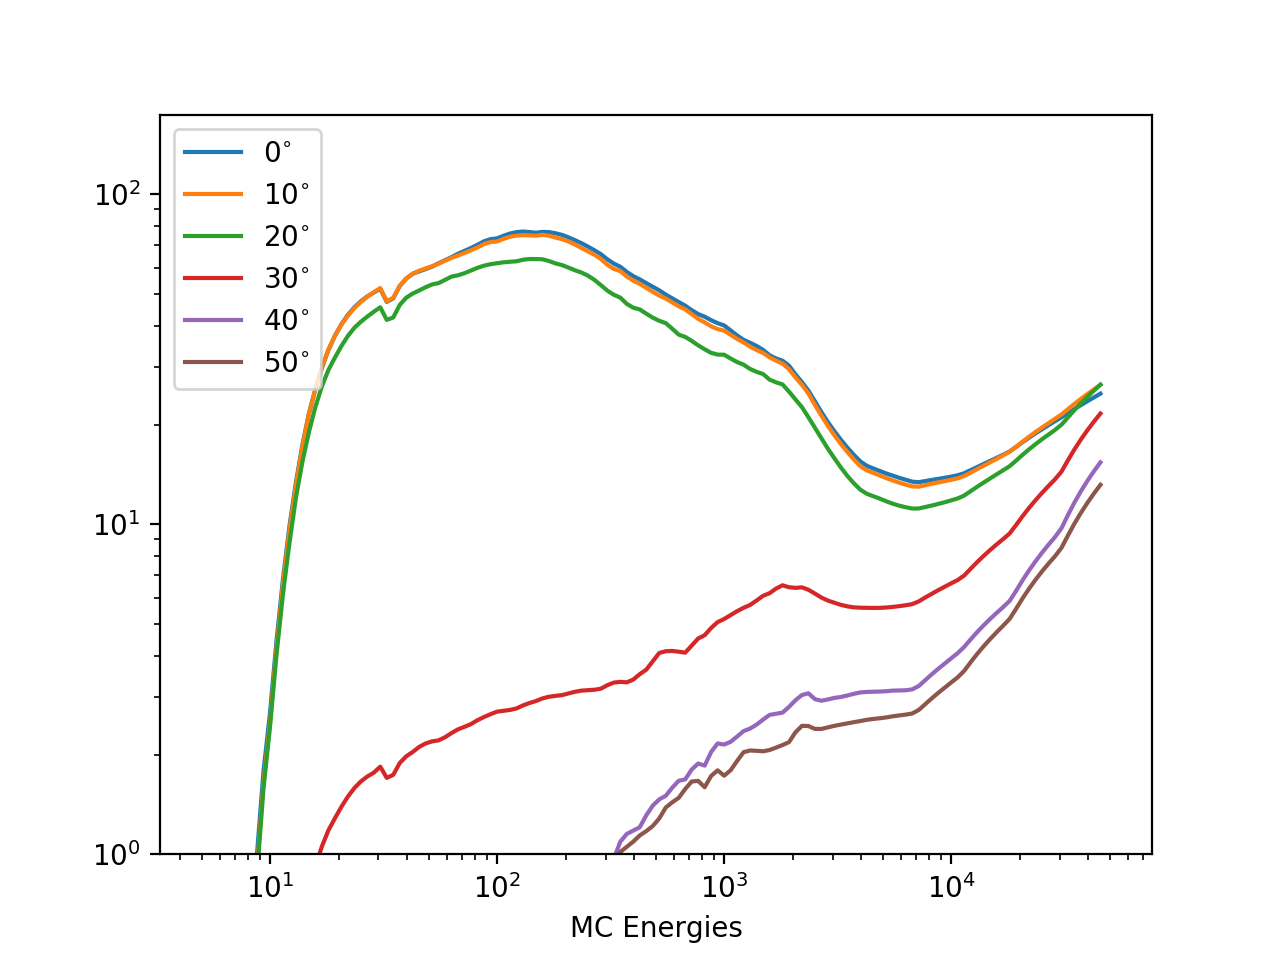

In [19]:
fig, ax = plt.subplots()

bounds = np.vstack((gbm_n6_generator.monte_carlo_energies[:-1],gbm_n6_generator.monte_carlo_energies[1:])).T
de = np.diff(bounds)
ene = np.mean(bounds,axis=1)

for angle in range(0,60,10):
    
    gbm_n6_generator.set_location(angle,0)

    ax.loglog(ene,gbm_n6_generator.matrix.sum(axis=0),label=r'%d$^{\circ}$'%angle)

ax.set_ylim(1)
ax.legend()
ax.set_xlabel(r'Effective Area (cm$^2$)');
ax.set_xlabel('MC Energies');

In [ ]:
gbm_n6_generator.